# 1. 导入包

In [1]:
# -*- coding: utf-8 -*-
"""
Python 3.7.7
sklearn 0.23.1
使用多元线性回归根据多个因素预测医疗费用
"""

# 导入包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 2. 导入数据集

In [2]:
# 导入数据集
data = pd.read_csv('insurance.csv')

# 3. 数据预处理

## 3.1 检测缺失值

In [3]:
# 检测缺失值
null_df = data.isnull().sum()

## 3.2 标签编码&独热编码

In [4]:
# 标签编码&独热编码
data = pd.get_dummies(data, drop_first = True) 

## 3.3 得到自变量和因变量

In [5]:
# 得到自变量和因变量
y = data['charges'].values
data = data.drop(['charges'], axis = 1)
x = data.values

## 3.4 拆分训练集和测试集

In [6]:
# 拆分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

# 4. 构建多元线性回归模型

In [7]:
# 构建多元线性回归模型
regressor = LinearRegression(normalize = True, fit_intercept = True)
regressor.fit(x_train, y_train)

LinearRegression(normalize=True)

# 5. 得到模型表达式

In [8]:
# 得到模型表达式
print('数学表达式是：\n Charges = ', end='')
columns = data.columns
coefs = regressor.coef_
for i in range(len(columns)):
    print('%s * %.2f + ' %(columns[i], coefs[i]), end='')
print(regressor.intercept_)

数学表达式是：
 Charges = age * 257.49 + bmi * 321.62 + children * 408.06 + sex_male * -242.15 + smoker_yes * 23786.49 + region_northwest * -396.10 + region_southeast * -1038.38 + region_southwest * -903.03 + -11297.610008539417


#### 由上述数学表达式可见，smoker_yes变量对因变量较大

# 6. 预测测试集

In [9]:
# 预测测试集
y_pred = regressor.predict(x_test)

# 7. 得到模型MSE

In [10]:
# 得到模型的MSE
mse_score = mean_squared_error(y_test, y_pred)
print('多元线性回归模型的MSE是：%.2f' %(mse_score)) # 35,479,352.81

多元线性回归模型的MSE是：35479352.81


# 8. 画出吸烟与医疗费用的小提琴图

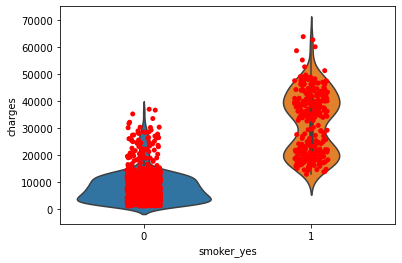

In [11]:
# 画出吸烟与医疗费用的小提琴图
data['charges'] = y
sns.violinplot(x='smoker_yes', y='charges', data=data)
sns.stripplot(x='smoker_yes', y='charges', jitter=True, color='red', data=data)

#### 结论
由上述小提琴图可见，不吸烟者（左图）大多数集中在中位数以下，中位数以上的点占少数；
吸烟者（右图）小提琴图上下比较对称分布较均匀，且最小值都达到不吸烟者医疗费用的中位数；
2个小提琴图对比说明吸烟者的平均医疗费用远远高于不吸烟者的平均医疗费用。
这证明多元线性回归模型的数学表达式比较准确，吸烟与否很大程度影响着医疗费用。